In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pymongo import MongoClient
import flask
from pprint import pprint

In [71]:
from bokeh.io import show
from bokeh.plotting import figure
from bokeh.transform import cumsum
from bokeh.palettes import Category20c
from math import pi

In [17]:
mongo = MongoClient(port=27017)

In [19]:
db = mongo['spotifydb']

In [21]:
print(db.list_collection_names())

['mycollection']


In [23]:
print(db.mycollection.find_one())

{'_id': ObjectId('6710606830fe83f54afa5468'), 'artist': 'britney spears', 'song': 'oops!...i did it again', 'duration_ms': 211160, 'explicit': 'False', 'year': 2000, 'popularity': 77, 'danceability': 0.751, 'energy': 0.834, 'key': 1, 'loudness': -5.444, 'mode': 0, 'speechiness': 0.0437, 'acousticness': 0.3, 'instrumentalness': 1.77e-05, 'liveness': 0.355, 'valence': 0.894, 'tempo': 95.053, 'genre': 'pop', 'duration_minutes': 3.5193333333333334}


In [27]:
collection = db['mycollection']

In [29]:
data = collection.find()

In [31]:
spotify_df = pd.DataFrame(list(data))

In [33]:
x_field = 'danceability'

In [35]:
y_field = 'energy'

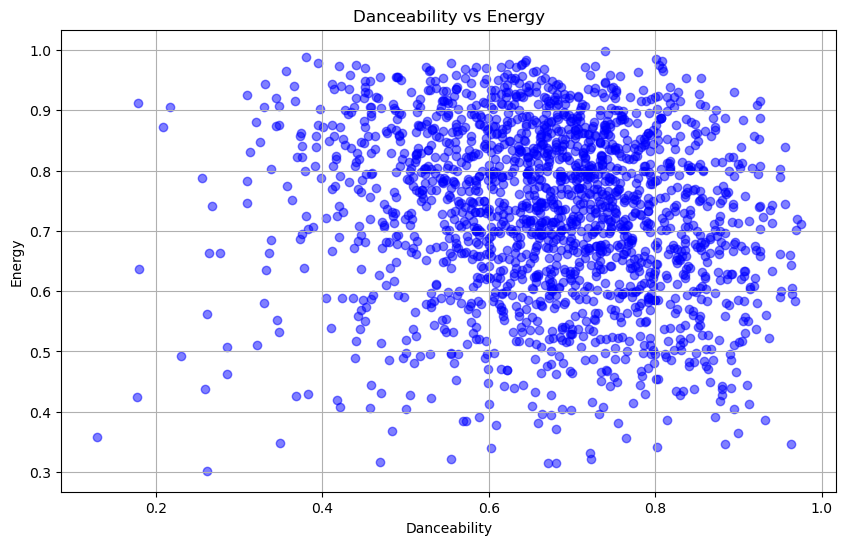

In [39]:
plt.figure(figsize=(10, 6))
plt.scatter(spotify_df[x_field], spotify_df[y_field], color='blue', alpha=0.5)
plt.title('Danceability vs Energy')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.grid(True)

# Step 7: Show the plot
plt.show()


In [61]:
genre_counts = spotify_df['genre'].value_counts().reset_index()
genre_counts

,genre,count
0,pop,872
1,hip hop,719
2,rock,153
3,Dance/Electronic,38
4,set(),22
5,latin,14
6,R&B,11
7,World/Traditional,9
8,country,9
9,metal,8


In [63]:
genre_counts.columns = ['genre', 'count']

In [73]:
genre_counts['angle'] = genre_counts['count'] / genre_counts['count'].sum() * 2 * pi
genre_counts['color'] = Category20c[len(genre_counts)]

In [77]:
p = figure(outer_height=350, title="Song Genres Distribution", toolbar_location=None,
           tools="hover", tooltips="@genre: @count", x_range=(-0.5, 1.0))


In [79]:
p.wedge(x=0, y=1, radius=0.4, start_angle=cumsum('angle', include_zero=True),
         end_angle=cumsum('angle'), line_color="white", fill_color='color', legend_field='genre', source=genre_counts)


GlyphRenderer(id='p1039', ...)

In [81]:
p.circle(x=0, y=1, radius=0.2, color="white")


GlyphRenderer(id='p1052', ...)

In [83]:
p.axis.axis_label = None
p.axis.visible = False
p.grid.grid_line_color = None

show(p)